<a href="https://colab.research.google.com/github/jhlopesalves/data-science-practice-notebook/blob/main/Python/machine_learning/supervised_learning_with_scikit-learn/supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Two Paradigms of Machine Learning

Machine learning is a field of artificial intelligence focused on building systems that learn from experience. Instead of writing explicit, rule-based instructions, a developer provides data to a learning algorithm, which uncovers patterns and builds a model to perform a task.

### Unsupervised Learning

The goal of unsupervised learning is to explore and find hidden structures within **unlabeled data**. You don't provide the model with any "correct answers." Instead, the algorithm works on its own to discover patterns.

  * **Analogy**: Imagine being given a box of assorted fruits and being asked to sort them into groups. You would use their properties—size, colour, shape—to cluster them, without knowing their names in advance.
  * **Common Task**: **Clustering**, where data points are grouped into distinct categories based on their similarity. For example, a business might cluster its customers into different segments based on their purchasing behaviour.

#### Supervised Learning

Supervised learning is the most common form of machine learning. It works with **labeled data**, meaning that for each observation, you have both the input features and the known, correct output (the "target" or "label").

  * **Analogy**: Imagine learning to identify animals by studying a set of flashcards. Each card has a picture of an animal (the features) and its name on the back (the label). After studying many cards, you can identify a new animal you haven't seen before.
  * **Goal**: To learn a mapping function that can accurately predict the target variable for new, unseen data.


### A Deeper Look at Supervised Learning

Supervised learning problems are typically divided into two main categories, defined by the type of target variable you are trying to predict.

#### Classification vs. Regression

  * **Classification**: The target variable is **categorical**. The model's goal is to predict a discrete class label.

      * **Example**: Predicting if a bank transaction is `fraudulent` or `not fraudulent`.
      * **Visualization**: The model learns a "decision boundary" to separate the different classes.

  * **Regression**: The target variable is **continuous**. The model's goal is to predict a specific numerical value.

      * **Example**: Predicting the price of a house based on its square footage.
      * **Visualization**: The model learns a line or curve that best fits the data points.

#### Essential Terminology

The field uses specific vocabulary to describe the components of a model.

| Term | Synonyms | Description |
| :--- | :--- | :--- |
| **Features** | Predictor Variables, Independent Variables | The input variables (columns) used by the model to make a prediction. |
| **Target Variable**| Dependent Variable, Response Variable| The output variable that the model is trained to predict. |
| **Sample**| Observation, Instance | A single data point, consisting of a set of features and its corresponding target value. |

### Preparing Your Data for `scikit-learn`

Before applying a supervised learning algorithm, your data must meet several requirements:

1.  **No Missing Values**: Models cannot process `NaN` values. Any missing data must be handled, typically by dropping the rows or imputing a value.
2.  **Numeric Format**: The algorithms work with numbers. All features, including categorical ones, must be converted into a numeric format (e.g., using one-hot encoding).
3.  **Standard Data Structures**: The data should be stored in a `pandas` DataFrame or a `NumPy` array.

Performing **Exploratory Data Analysis (EDA)** is the critical first step where you check for and address these issues.

### The `scikit-learn` API: A Consistent Workflow

A major strength of the `scikit-learn` library is its simple and consistent API. The process for training and using nearly any model follows the same four steps.

```python
# Import the desired model class from a scikit-learn module
from sklearn.module import Model

# --- Step 1 & 2: Instantiate the Model ---
# This creates an instance of the algorithm. You can set hyperparameters here.
model = Model(hyperparameter=value)

# --- Step 3: Fit the Model (Training) ---
# The .fit() method is the "learning" step. The model learns the relationship
# between the feature matrix `X` and the target vector `y`.
model.fit(X_train, y_train)

# --- Step 4: Predict ---
# The .predict() method uses the learned patterns to make predictions
# on new, unseen data `X_new`.
predictions = model.predict(X_new)

# The output is an array of predicted labels or values.
print(predictions)
```

This clean, repeatable workflow—**Instantiate, Fit, Predict**—makes it easy to experiment with different algorithms and build powerful predictive models.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
url = "https://assets.datacamp.com/production/repositories/5981/datasets/8582db71ec282f17c504c8eb794d54758fd8d5d8/telecom_churn_clean.csv"
churn_df = pd.read_csv(
    url,
    usecols=lambda col: not col.startswith("Unnamed"),
)
churn_df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [3]:
from sklearn.neighbors import KNeighborsClassifier

X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values

print(X.shape, y.shape)

(3333, 2) (3333,)


In [4]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

In [5]:
X_new = np.array([[56.8, 17.5], [24.4, 24.1], [50.1, 10.9]])

print(X_new.shape)

(3, 2)


In [6]:
predictions = knn.predict(X_new)
print(f"Predictions: {predictions}")

Predictions: [1 0 0]


### k-Nearest Neighbors: Fit
In this exercise, you will build your first classification model using the `churn_df dataset`, which has been preloaded for the remainder of the chapter.

The target, `"churn"`, needs to be a single column with the same number of observations as the feature data. The feature data has already been converted into `numpy` arrays.

`"account_length"` and `"customer_service_calls"` are treated as features because account length indicates customer loyalty, and frequent customer service calls may signal dissatisfaction, both of which can be good predictors of churn.

In [7]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [8]:
X_new = np.array([[30.0, 17.5], [107.0, 24.1], [213.0, 10.9]])

y_pred = knn.predict(X_new)

print(f"Predictions: {y_pred}")

Predictions: [0 1 0]


## The Need for an Honest Evaluation

After training a model, we need a way to measure how well it performs. For classification tasks, the most straightforward metric is **accuracy**, which is simply the proportion of correct predictions.

**Accuracy** = `(Number of Correct Predictions) / (Total Number of Observations)`

A crucial mistake is to calculate accuracy on the same data the model was trained on. This is like giving a student the final exam questions and answers to study with - of course, they'll score perfectly\! A model evaluated on its training data will often appear to perform exceptionally well, but this score doesn't reflect its ability to **generalize** to new, unseen data, which is the entire point of machine learning.

The correct approach is to split our labeled data into two parts:

  * **Training Set**: The majority of the data, used to `fit` the model.
  * **Test Set**: A smaller, hold-out portion of the data, used exclusively for evaluating the final performance of the fitted model.

### Train/Test Split in `scikit-learn`

`scikit-learn` provides a convenient function, `train_test_split`, to perform this data splitting.

```python
from sklearn.model_selection import train_test_split

# X: features, y: target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=42,
                                                   stratify=y)
```

This function has several important parameters:

  * `test_size`: The proportion of the dataset to allocate to the test set (e.g., `0.3` for 30%).
  * `random_state`: A seed for the random number generator. Setting this ensures that the split is **reproducible**—you'll get the same train/test split every time you run the code.
  * `stratify`: This is particularly useful for classification. `stratify=y` ensures that the distribution of the target variable `y` is the same in both the training and test sets. This prevents a scenario where, by chance, one set gets a disproportionate number of samples from a specific class.

Once the data is split, we can fit our model and score it:

```python
from sklearn.neighbors import KNeighborsClassifier
# Assume X_train, X_test, y_train, y_test are available

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

# The .score() method calculates the accuracy on the test data
print(knn.score(X_test, y_test))
```
### Model Complexity, Overfitting, and Underfitting

The performance of a model is closely tied to its **complexity**. In the case of our k-Nearest Neighbors (k-NN) algorithm, complexity is controlled by the number of neighbors, `k`.

  * **Low `k` (e.g., k=1)**: This creates a **highly complex** model. The decision boundary is very jagged and follows the training data closely, including its noise. This can lead to **overfitting**, where the model performs perfectly on the training data but poorly on the test data because it has memorized the noise instead of learning the underlying pattern.
  * **High `k` (e.g., k=50)**: This creates a **less complex** (simpler) model. The decision boundary is very smooth. This can lead to **underfitting**, where the model is too simple to capture the true underlying pattern in the data, resulting in poor performance on both the training and test sets.

The goal is to find a "sweet spot" for `k` that balances this trade-off, creating a model that generalizes well.


### Visualizing Model Performance

We can find the optimal value for `k` by fitting and evaluating the model with a range of different `k` values and plotting the results. This allows us to visually inspect the trade-off between training and testing accuracy.

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Create a generic, reproducible dataset
np.random.seed(42)
X = np.random.rand(100, 2)
# Create a circular decision boundary for a clear example
y = ((X - 0.5)**2).sum(axis=1) < 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)


# Set up dictionaries to store training and testing accuracies
train_accuracies = {}
test_accuracies = {}

# Define a range of k values to test
neighbors = np.arange(1, 26)

# Loop through the range of k values
for k_value in neighbors:
    # Instantiate the model
    knn = KNeighborsClassifier(n_neighbors=k_value)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Store the accuracies
    train_accuracies[k_value] = knn.score(X_train, y_train)
    test_accuracies[k_value] = knn.score(X_test, y_test)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("k-NN: Model Complexity vs. Accuracy")
ax.plot(train_accuracies.keys(), train_accuracies.values(), label="Training Accuracy")
ax.plot(test_accuracies.keys(), test_accuracies.values(), label="Testing Accuracy")
ax.legend()
ax.set_xlabel("Number of Neighbors (k)")
ax.set_ylabel("Accuracy")
ax.set_xticks(np.arange(0, 27, 2))
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
```

The resulting plot will typically show:

  * **Training Accuracy**: Starts very high (often 1.0 for k=1) and gradually decreases as `k` increases and the model becomes less complex.
  * **Testing Accuracy**: Starts lower, increases to a peak, and then decreases as the model starts to underfit.

The optimal value for `k` is the one that corresponds to the **highest point on the testing accuracy curve**, as this represents the model that generalizes best to unseen data.

In [9]:
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8740629685157422


In [10]:
# Create neighbors as a numpy array of values from 1 up to and including 12.
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)

    # Fit the model
    knn.fit(X_train, y_train)

    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

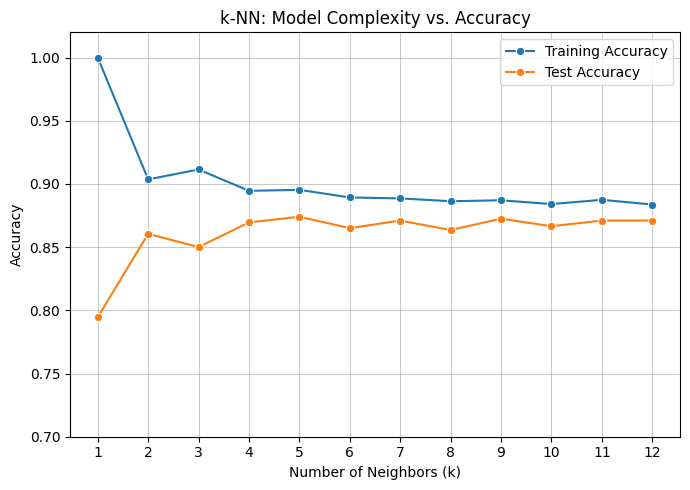

In [11]:
fig, ax = plt.subplots(figsize=(7, 5))

# Order accuracies to match the neighbors array
train_vals = [train_accuracies[k] for k in neighbors]
test_vals = [test_accuracies[k] for k in neighbors]

sns.lineplot(x=neighbors, y=train_vals, marker="o", label="Training Accuracy", ax=ax)
sns.lineplot(x=neighbors, y=test_vals, marker="o", label="Test Accuracy", ax=ax)

ax.set(
    xlabel="Number of Neighbors (k)",
    ylabel="Accuracy",
    title="k-NN: Model Complexity vs. Accuracy",
)

ax.set_xticks(neighbors)
ax.set_ylim(0.7, 1.02)
ax.grid(True, alpha=0.5, linewidth=0.6, color="grey")

ax.legend()
plt.tight_layout()
plt.show()

## Introduction to Regression with `scikit-learn`

While classification models predict discrete labels (e.g., `spam` vs. `not spam`), **regression models** are used when the target variable is continuous. The goal of regression is to understand the relationship between one or more independent variables (features) and a dependent, continuous variable (the target), and to use this relationship to predict numerical outcomes. Examples include predicting a house's price, a patient's blood pressure, or a company's future revenue.

The foundational algorithm in this domain is **Linear Regression**, which aims to find the straight line that best fits the data, describing a linear relationship between the features and the target.

### Step 1: Preparing Data for Regression

The data preparation process for regression is nearly identical to that for classification. We must separate our dataset into a feature matrix, typically denoted `X`, and a target vector, `y`.

  * **`X` (Features)**: A two-dimensional array or DataFrame where each column is a feature and each row is an observation.
  * **`y` (Target)**: A one-dimensional array or Series containing the continuous target values we wish to predict.

It is standard practice to convert these into NumPy arrays using `.values` to ensure compatibility with `scikit-learn`.

```python
# Let's create a generic, reproducible dataset.
# We will predict a 'performance_score' based on 'hours_trained'.
np.random.seed(42)
data = {
    'hours_trained': np.linspace(0, 50, 100),
    'noise': np.random.normal(0, 5, 100) # Add some random noise
}
df_performance = pd.DataFrame(data)
df_performance['performance_score'] = 50 + (1.5 * df_performance['hours_trained']) + df_performance['noise']

print(df_performance.head())

# Create the feature matrix (X) and target vector (y)
# For now, we will use a single feature.
X_feature = df_performance[['hours_trained']].values
y_target = df_performance['performance_score'].values

print(f"Shape of feature matrix X: {X_feature.shape}")
print(f"Shape of target vector y: {y_target.shape}")
```

#### A Note on Feature Shape

A critical requirement of `scikit-learn` is that the feature matrix `X` must be two-dimensional, even if you are only using a single feature. The shape should be `(n_samples, n_features)`. When we select a single column from a pandas DataFrame, it becomes a one-dimensional Series. We must reshape it into a 2D array with one column.

  * **Why**: The library's API is designed to consistently handle a matrix of features, so it expects a 2D structure.
  * **How**: If you have a 1D array `my_feature`, you can reshape it using `my_feature.reshape(-1, 1)`. The `-1` is a placeholder that tells NumPy to automatically infer the number of rows based on the array's length.

```python
# If we had selected a 1D array initially:
single_feature_1d = df_performance['hours_trained'].values
print(f"Shape of 1D array: {single_feature_1d.shape}")

# We would reshape it like this:
single_feature_2d = single_feature_1d.reshape(-1, 1)
print(f"Shape of reshaped 2D array: {single_feature_2d.shape}")
```

Our initial selection `df_performance[['hours_trained']].values` (using double square brackets) correctly produces a 2D array from the start.

### Step 2: Visualising the Relationship

Before fitting a model, it is essential to visualise the data to understand the relationship between the feature and the target. For a single feature and a continuous target, a scatter plot is the ideal visualisation.

```python
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the scatter plot using seaborn
sns.scatterplot(x=X_feature.flatten(), y=y_target, alpha=0.6, ax=ax)

# Customize the plot
ax.set_title('Relationship between Training Hours and Performance Score')
ax.set_xlabel('Hours Trained')
ax.set_ylabel('Performance Score')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()
```

The scatter plot reveals a clear positive linear trend: as the hours trained increase, the performance score also tends to increase. This visual confirmation suggests that a linear regression model is a suitable choice.

### Step 3: Fitting a Linear Regression Model

The process for fitting a regression model in `scikit-learn` follows the exact same API pattern as classification: **Instantiate, Fit, Predict**.

1.  **Instantiate**: Create an instance of the `LinearRegression` model.
2.  **Fit**: Call the `.fit()` method on the training data (`X_feature`, `y_target`). The model learns the optimal slope and intercept for the line that best fits the data.
3.  **Predict**: Use the fitted model's `.predict()` method to generate predictions for the feature data.


```python
from sklearn.linear_model import LinearRegression

# 1. Instantiate the model
reg_model = LinearRegression()

# 2. Fit the model to the data
reg_model.fit(X_feature, y_target)

# 3. Generate predictions for the input data
# The model now knows the line equation and can predict a y-value for any given x-value.
predictions = reg_model.predict(X_feature)
```

### Step 4: Visualising the Regression Line

The output of our linear regression model is a straight line. The best way to assess the model's fit is to plot this line over our original scatter plot.

```python
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the original data points using seaborn
sns.scatterplot(x=X_feature.flatten(), y=y_target, alpha=0.6, label='Actual Data', ax=ax)

# Plot the regression line using seaborn
sns.lineplot(x=X_feature.flatten(), y=predictions, color='red', linewidth=2, label='Regression Line', ax=ax)

# Customize the plot
ax.set_title('Linear Regression Fit')
ax.set_xlabel('Hours Trained')
ax.set_ylabel('Performance Score')
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()
```

The red line represents the model's learned relationship. It is the line that minimises the overall distance to all the data points (specifically, it minimises the "sum of squared errors"). This model can now be used to predict the performance score for any new value of `hours_trained`.

In [12]:
url = "https://assets.datacamp.com/production/repositories/5981/datasets/3d7b5bbdc7e91636cb1f9b62d9ca2a3959ce8aab/diabetes_clean.csv"
diabetes_df = pd.read_csv(
    url,
    usecols=lambda col: not col.startswith("Unnamed"),
)
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# Creating feature and target arrays
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values

In [14]:
# Making predictions from a single feature
X_bmi = diabetes_df[["bmi"]].values

print(y.shape, X_bmi.shape)

(768,) (768, 1)


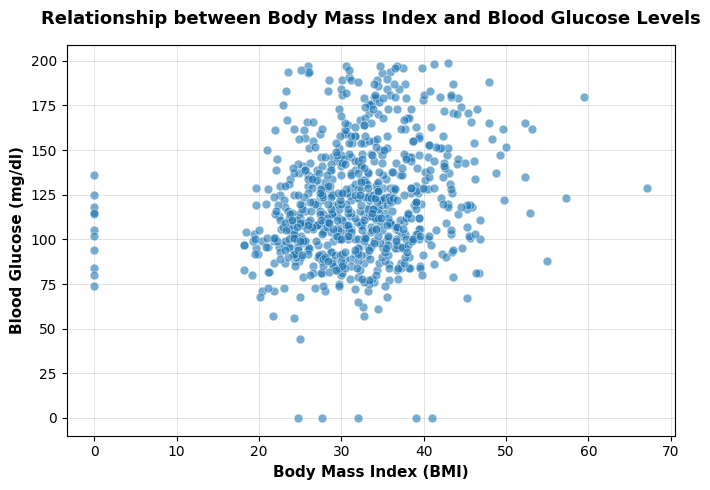

In [15]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.scatterplot(x=X_bmi.flatten(), y=y, alpha=0.6, s=40, ax=ax)

ax.set_xlabel("Body Mass Index (BMI)", fontsize=11, fontweight="semibold")
ax.set_ylabel("Blood Glucose (mg/dl)", fontsize=11, fontweight="semibold")
ax.set_title(
    "Relationship between Body Mass Index and Blood Glucose Levels",
    fontsize=13,
    fontweight="bold",
    pad=15,
)

ax.grid(True, alpha=0.3, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

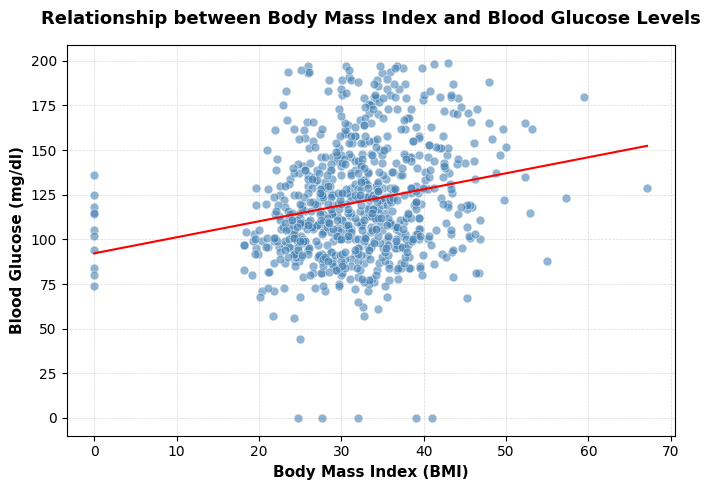

In [16]:
# Fitting a regression model
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)

# Plotting the predictions
fig, ax = plt.subplots(figsize=(7, 5))

sns.scatterplot(x=X_bmi.flatten(), y=y, alpha=0.6, color="steelblue", s=40, ax=ax)
sns.lineplot(x=X_bmi.flatten(), y=predictions, color="red", ax=ax)

ax.set_xlabel("Body Mass Index (BMI)", fontsize=11, fontweight="semibold")
ax.set_ylabel("Blood Glucose (mg/dl)", fontsize=11, fontweight="semibold")
ax.set_title(
    "Relationship between Body Mass Index and Blood Glucose Levels",
    fontsize=13,
    fontweight="bold",
    pad=15,
)

ax.grid(True, alpha=0.3, linewidth=0.5, color="grey", linestyle="--")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

### Creating features
In this chapter, you will work with a dataset called `sales_df`, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign.

You will use the advertising expenditure as features to predict sales values, initially working with the `"radio"` column. However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.

In [17]:
url = "https://assets.datacamp.com/production/repositories/5981/datasets/0013cbcdf127f3b44e855eb1df754b9dc3526d02/advertising_and_sales_clean.csv"
sales_df = pd.read_csv(
    url,
    usecols=lambda col: not col.startswith("Unnamed"),
)
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [18]:
# Create X from the radio column's values (as a 2D array) and y from sales
X = sales_df[["radio"]].values
y = sales_df["sales"].values

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


### Building a linear regression model
Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

In [19]:
# Import LinearRegression.
from sklearn.linear_model import LinearRegression

# Instantiate a linear regression model.
reg = LinearRegression()

# Predict sales values using X, storing as predictions.
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


### Visualizing a linear regression model
Now you have built your linear regression model and trained it using all available observations, you can visualize how well the model fits the data. This allows you to interpret the relationship between `radio` advertising expenditure and sales values.

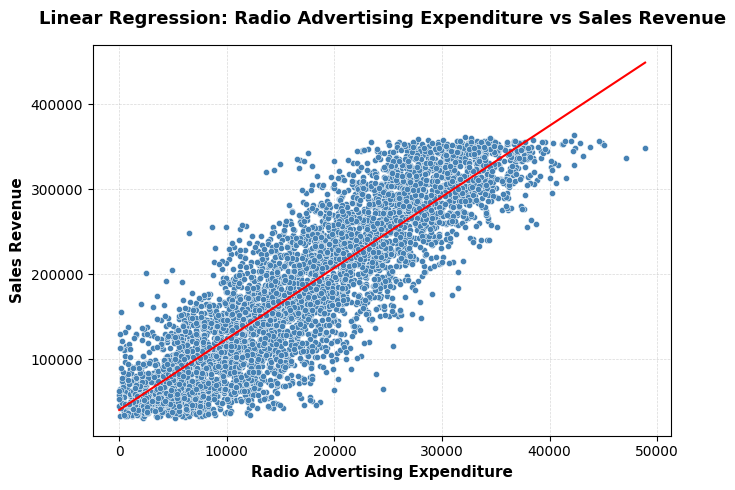

In [20]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.scatterplot(x=X.flatten(), y=y, alpha=1, color="steelblue", s=20, ax=ax)
sns.lineplot(x=X.flatten(), y=predictions, color="red", ax=ax)

ax.set_xlabel("Radio Advertising Expenditure", fontsize=11, fontweight="semibold")
ax.set_ylabel("Sales Revenue", fontsize=11, fontweight="semibold")
ax.set_title(
    "Linear Regression: Radio Advertising Expenditure vs Sales Revenue",
    fontsize=13,
    fontweight="bold",
    pad=15,
)

ax.grid(True, alpha=0.3, linewidth=0.5, color="grey", linestyle="--")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

## The Basics of Linear Regression

To build a linear regression model, you find the line (or hyperplane) that best fits your data. This is done by choosing the model's parameters—its slope and intercept—that **minimize** the overall error between the model's predictions and the actual data points. The most common method for this is called **Ordinary Least Squares (OLS)**.

## How Linear Regression "Learns": Minimizing Errors

At its heart, linear regression is about finding the best-fitting straight line to describe the relationship between features and a target. For **simple linear regression** (one feature), this line is described by the familiar equation:

$y = ax + b$

Where:

  * `y` is the **target** variable we want to predict.
  * `x` is the single **feature** variable.
  * `a` and `b` are the model's **parameters**: `a` is the **slope** (how much `y` changes for a one-unit change in `x`), and `b` is the **y-intercept** (the value of `y` when `x` is zero).

The central question is: out of all the infinite possible lines, how does the algorithm choose the best `a` and `b`?

It does so by defining an **error function** (also called a **loss function** or **cost function**). This function quantifies how "wrong" a given line is for the data. The goal is to find the line that makes this error as small as possible.

The method used by standard linear regression is called **Ordinary Least Squares (OLS)**. The error function it seeks to minimize is the **Residual Sum of Squares (RSS)**. A **residual** is simply the vertical distance between an actual data point ($y\_i$) and the predicted point on the regression line ($\\hat{y}\_i$).

The RSS is calculated as:

$$RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

OLS works by finding the specific values of `a` and `b` that result in the **minimum possible RSS**. It "squares" the errors so that negative residuals (points below the line) don't cancel out positive ones, and it penalizes larger errors more heavily.


### Linear Regression in Higher Dimensions

The concept extends directly to **multiple linear regression**, where we use more than one feature to predict the target. The equation simply includes more terms:

$y = a\_1x\_1 + a\_2x\_2 + \\dots + a\_nx\_n + b$

Here, the model must find an optimal **coefficient** (`a`) for *each* of the `n` features, plus the intercept `b`. Geometrically, this is no longer a line but a **hyperplane** that slices through the higher-dimensional space.

Despite this increase in complexity, the core principle of OLS remains the same: find the set of coefficients and the intercept that minimize the RSS. A beautiful feature of `scikit-learn` is that its API doesn't change. You `fit` the model on your feature matrix `X`, and the library handles finding all the necessary coefficients, whether you have one feature or one thousand.


### Evaluating Regression Model Performance

Once we've trained our model, we need to evaluate how well it performs on unseen test data. For regression, accuracy isn't the right metric. Instead, we use metrics that measure the magnitude of the model's prediction errors.

### R-squared ($R^2$)

**R-squared** measures the **proportion of the variance in the target variable that is predictable from the feature variables**.

  * **Range**: Its value is typically between 0 and 1.
  * **Interpretation**:
      * An $R^2$ of 1 means the model perfectly explains all the variability in the target data.
      * An $R^2$ of 0 means the model explains none of the variability (it's no better than simply predicting the mean of the target).
      * An $R^2$ of 0.75 means that 75% of the variance in the target can be explained by the features in the model.
  * **In `scikit-learn`**: The `.score()` method of a fitted regression model conveniently returns the $R^2$ value.

#### Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)

While $R^2$ gives us a proportional measure of fit, **Root Mean Squared Error (RMSE)** gives us a measure of the typical error magnitude in the original units of the target variable.

First, we define **Mean Squared Error (MSE)**:

$$MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

This is simply the average of the squared errors. However, its units are the *square* of the target's units (e.g., "dollars squared"), which isn't very interpretable. To fix this, we take the square root to get the RMSE.

$$RMSE = \sqrt{MSE}$$

  * **Interpretation**: The RMSE can be interpreted as the "standard deviation of the residuals." It tells you, on average, how far your model's predictions are from the actual values, measured in the **same units as your target variable**. A smaller RMSE indicates a better fit.


### Practical Implementation in `scikit-learn`

Let's put this all together. We'll fit a multiple linear regression model and evaluate it using both $R^2$ and RMSE.

```python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

# Create a generic, reproducible dataset with multiple features
np.random.seed(42)
X = pd.DataFrame(np.random.rand(100, 3), columns=['feature_1', 'feature_2', 'feature_3'])
y = 10 * X['feature_1'] + 5 * X['feature_2'] - 3 * X['feature_3'] + np.random.normal(0, 2, 100)

# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Instantiate and fit the model
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred = reg_all.predict(X_test)

# 4. Evaluate the model

# Calculate R-squared using the .score() method
r_squared = reg_all.score(X_test, y_test)
print(f"R-squared (R²): {r_squared:.4f}")

# Calculate Root Mean Squared Error
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
```

This workflow—**split, fit, predict, evaluate**—is the cornerstone of building and testing supervised learning models. Using metrics like $R^2$ and RMSE provides a quantitative way to understand your regression model's performance.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# First, let's check what columns we have and handle categorical data
print("Columns in sales_df:", sales_df.columns.tolist())
print("Data types:")
print(sales_df.dtypes)

# Select only numeric columns for features (excluding 'sales' which is our target)
numeric_columns = sales_df.select_dtypes(include=[np.number]).columns.tolist()
if "sales" in numeric_columns:
    numeric_columns.remove("sales")

print("Using numeric features:", numeric_columns)

# Create X, an array containing values of numeric features, and y, containing all values from the "sales" column.
X = sales_df[numeric_columns].values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Instantiate a linear regression model.
reg = LinearRegression()

# Fit the model to the training data.
reg.fit(X_train, y_train)

# Create y_pred, making predictions for sales using the test features.
y_pred = reg.predict(X_test)

for i in range(min(5, len(y_pred))):
    print(
        f"Sample {i+1}: Predicted = {y_pred[i]:.2f}, Actual = {y_test[i]:.2f}, Error = {abs(y_pred[i] - y_test[i]):.2f}"
    )

Columns in sales_df: ['tv', 'radio', 'social_media', 'influencer', 'sales']
Data types:
tv              float64
radio           float64
social_media    float64
influencer       object
sales           float64
dtype: object
Using numeric features: ['tv', 'radio', 'social_media']
Sample 1: Predicted = 53176.66, Actual = 55261.28, Error = 2084.62
Sample 2: Predicted = 70996.20, Actual = 67574.90, Error = 3421.30
Sample 3: Predicted = 267032.64, Actual = 272250.11, Error = 5217.47
Sample 4: Predicted = 195731.02, Actual = 195102.18, Error = 628.84
Sample 5: Predicted = 274005.60, Actual = 273960.38, Error = 45.22


In [22]:
# Import root_mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Print the metrics
print(f"R-squared (R²): {r_squared:.4f}")
print(f"The model explains {r_squared:.1%} of the variance in sales data")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"On average, predictions are off by ${rmse:.2f} in sales")

R-squared (R²): 0.9990
The model explains 99.9% of the variance in sales data
Root Mean Squared Error (RMSE): 2944.43
On average, predictions are off by $2944.43 in sales


## The Problem with a Single Train/Test Split

When you evaluate a model using a single, random train/test split, the resulting performance metric (like accuracy or R-squared) is highly dependent on that specific split. By pure chance, the test set could contain particularly "easy" or "hard" examples, leading to an overly optimistic or pessimistic evaluation of the model's true ability to generalize. Cross-validation is the solution to this problem.


### The k-Fold Cross-Validation Process

**k-Fold Cross-Validation** provides a more robust estimate of model performance by repeating the train/test process multiple times. The algorithm is as follows:

1.  The dataset is randomly shuffled and split into `k` equal-sized groups, called **folds**. A common choice for `k` is 5 or 10.
2.  The model is trained using `k-1` of the folds as the training data.
3.  The trained model is then evaluated on the remaining single fold, which serves as the test data. The performance score is recorded.
4.  This process is repeated `k` times, with each of the `k` folds being used as the test set exactly once.

The result of this process is an array of `k` performance scores. The final cross-validation performance is typically reported as the **mean** and **standard deviation** of these scores. This gives you not only a more stable estimate of the model's performance but also an understanding of its variability across different subsets of the data. The main trade-off is computational cost: a `k`-fold cross-validation requires training the model `k` times.


### Cross-Validation in `scikit-learn`

The `scikit-learn` library provides a streamlined way to perform cross-validation using `KFold` and `cross_val_score`.

  * **`KFold`**: This is a cross-validation splitter. Its job is to define the splitting strategy.

      * `n_splits`: The number of folds, `k`.
      * `shuffle=True`: It is crucial to shuffle the data before splitting to ensure the folds are random and representative.
      * `random_state`: A seed to ensure the shuffle is **reproducible**.

  * **`cross_val_score`**: This function automates the entire cross-validation loop. You provide it with a model, the full dataset, and the splitting strategy from `KFold`.

### A Complete Example and Interpretation

Let's perform a 5-fold cross-validation for a linear regression model.

```python
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

# 1. Create a generic, reproducible dataset
np.random.seed(42)
X = np.random.rand(100, 5)
# Create a linear relationship with some noise
y = 2 * X[:, 0] + 3.5 * X[:, 1] - 1.5 * X[:, 2] + np.random.normal(0, 1, 100)

# 2. Instantiate the model
reg_model = LinearRegression()

# 3. Create and configure the KFold cross-validation splitter
# We'll use 5 folds, shuffle the data, and set a random_state for reproducibility.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Perform the cross-validation
# cross_val_score returns an array of scores, one for each fold.
# The default score for LinearRegression is R-squared.
cv_results = cross_val_score(reg_model, X, y, cv=kf)

# 5. Evaluate the cross-validation performance
mean_cv_score = np.mean(cv_results)
std_cv_score = np.std(cv_results)
# Calculate a 95% confidence interval for the performance
ci_95 = np.quantile(cv_results, [0.025, 0.975])

print(f"Individual Fold Scores (R-squared): {np.round(cv_results, 4)}")
print(f"Mean CV Score: {mean_cv_score:.4f}")
print(f"Standard Deviation of CV Scores: {std_cv_score:.4f}")
print(f"95% Confidence Interval for the Score: ({ci_95[0]:.4f}, {ci_95[1]:.4f})")
```

**Interpretation**:
The output gives us a much richer understanding of the model's performance than a single score. We can report that the model has an average R-squared of approximately **0.75**. Furthermore, the standard deviation of **0.08** tells us about the stability of this performance across different subsets of the data. The 95% confidence interval suggests that we can be reasonably confident that the model's true performance on unseen data will be between approximately **0.62** and **0.86**. This is a far more robust and reliable assessment than a single train/test split can provide.

In [23]:
from sklearn.model_selection import cross_val_score, KFold

# Instantiate a KFold splitter: n_splits=6 creates 6 folds; shuffle=True randomizes assignment; random_state ensures reproducibility.
kf = KFold(n_splits=6, shuffle=True, random_state=5)

# Instantiate a LinearRegression model; it fits a linear function by Ordinary Least Squares minimizing the RSS.
reg = LinearRegression()

# Run cross-validation: fits reg on X/y for each fold and returns per-fold scores (R² by default for regressors).
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print the per-fold CV scores to inspect variability and average performance.
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


In [24]:
# Calculate and print the mean of the results.
print(f"Mean of cross-validation: {np.mean(cv_scores)}")

# Calculate and print the standard deviation of cv_results.
print(f"STD of cross-validation: {np.std(cv_scores)}")

# Display the 95% confidence interval for your results using np.quantile().
print(f"95% CI of cross-validation: {np.quantile(cv_scores, [0.025, 0.975])}")

Mean of cross-validation: 0.9989896443678249
STD of cross-validation: 6.608118371529651e-05
95% CI of cross-validation: [0.99889767 0.99908583]


## The Problem of Overfitting and Large Coefficients
Standard Ordinary Least Squares (OLS) linear regression works by finding the coefficients that minimize the sum of squared errors. However, when a model has many features, or when some features are highly correlated, OLS can assign extremely large values to the coefficients. This makes the model highly sensitive to the specific training data, including its noise. This phenomenon is called **overfitting**, and it results in a model that performs well on the data it was trained on but fails to generalize to new, unseen data.
**Regularization** is the solution to this problem. It introduces a penalty term to the OLS loss function that constrains the size of the coefficients, leading to models that are less complex and generalize better.

### Types of Regularized Regression

#### Ridge Regression (L2 Regularization)
Ridge regression adds a penalty proportional to the **sum of the squared values** of the coefficients.

* **The Loss Function**: The goal is to minimize this combined function:  
  $$\text{Loss}_{\text{Ridge}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} \beta_j^2$$  
  Where $y_i$ is the actual value, $\hat{y}_i$ is the predicted value, $\beta_j$ are the model coefficients, and $\alpha$ is the regularization strength. (Note: The underbrace labels are omitted here for rendering simplicity; if needed, they can be added as separate text.)

* **The Hyperparameter $\alpha$**: The value of $\alpha$ is a **hyperparameter** that controls the trade-off between the model's fit and the size of its coefficients.  
  * If $\alpha = 0$, the penalty disappears, and Ridge regression is identical to OLS.  
  * As $\alpha$ increases, the penalty for large coefficients becomes stronger, forcing them to shrink towards zero. This reduces model complexity.  
  * A very large $\alpha$ can over-penalize the coefficients, leading to an overly simple model that **underfits** the data.

#### Lasso Regression (L1 Regularization)
Lasso (Least Absolute Shrinkage and Selection Operator) regression adds a penalty proportional to the **sum of the absolute values** of the coefficients.

* **The Loss Function**:  
  $$\text{Loss}_{\text{Lasso}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |\beta_j|$$

* **Lasso for Feature Selection**: The L1 penalty has a crucial property that the L2 penalty does not: it can shrink the coefficients of less important features all the way to **exactly zero**. This means Lasso can perform automatic **feature selection** by effectively removing irrelevant features from the model.


### A Complete Example: Lasso for Feature Selection

Let's demonstrate how Lasso's feature selection works in practice. We will create a dataset where only a few features are truly important for predicting the target, while the rest are just noise.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# 1. Create a generic, reproducible dataset
np.random.seed(42)
n_samples, n_features = 100, 10
X = np.random.randn(n_samples, n_features)
# Create a target variable that depends only on the first three features
y = 2 * X[:, 0] + 3.5 * X[:, 1] - 1.5 * X[:, 2] + np.random.normal(0, 1, n_samples)
feature_names = [f'feature_{i+1}' for i in range(n_features)]

# 2. Instantiate and fit the Lasso model
# Alpha is chosen via cross-validation in a real project; here we pick a value for demonstration.
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# 3. Extract and visualize the coefficients
lasso_coefs = lasso.coef_

# Plot the coefficients
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(feature_names, lasso_coefs)
ax.set_title("Lasso Regression Coefficients")
ax.set_ylabel("Coefficient Value")
ax.axhline(0, color='grey', linewidth=0.8) # Add a line at zero
plt.xticks(rotation=45)
plt.show()

# Print the coefficients
for name, coef in zip(feature_names, lasso_coefs):
    print(f"{name}: {coef:.4f}")
```

**Interpretation**:
The visualization and the printed output clearly show the power of Lasso for feature selection. The model correctly identified that `feature_1`, `feature_2`, and `feature_3` are the most important predictors and assigned them significant non-zero coefficients. Crucially, it has shrunk the coefficients for the other seven "noise" features to **exactly zero**, effectively removing them from the model. This results in a simpler, more interpretable model that is less likely to overfit.

In [25]:
from sklearn.linear_model import Ridge

scores = []
for alpha in [0.1, 10.0, 100.0, 1000.1]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))

print(scores)

[0.9990152104759369, 0.9990152104759419, 0.999015210475987, 0.9990152104764388]


In [26]:
from sklearn.linear_model import Lasso

scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

[0.9990152104762495, 0.9990152105072273, 0.9990152107889495, 0.9990152111033483, 0.9990152120375869]


In [27]:
# Lasso for feature selection in scikit-learn
from sklearn.linear_model import Lasso

X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values

names = diabetes_df.drop(labels="glucose", axis=1).columns

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

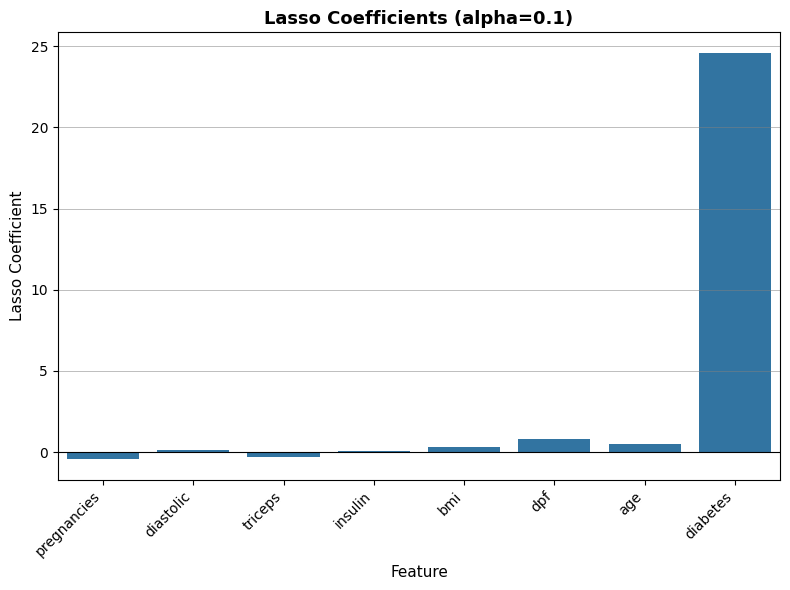

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))

# Bar plot of Lasso coefficients
sns.barplot(x=names, y=lasso_coef, ax=ax)
ax.axhline(0, color="black", linewidth=0.8)

ax.set_xlabel("Feature", fontsize=11)
ax.set_ylabel("Lasso Coefficient", fontsize=11)
ax.set_title(
    f"Lasso Coefficients (alpha={lasso.alpha})", fontsize=13, fontweight="bold"
)

# Rotate x tick labels for readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

ax.grid(True, alpha=0.6, linewidth=0.6, color="grey", axis="y")
plt.tight_layout()
plt.show()

### Regularized regression: Ridge
Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In this exercise, you will fit ridge regression models over a range of different alpha values, and print their scores. You will use all of the features in the sales_df dataset to predict "sales".

In [29]:
from sklearn.linear_model import Ridge

alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    score = ridge.score(X_test, y_test)
    ridge_scores.append(score)

print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.999015210475987, 0.9990152104764387, 0.9990152104809561]


### Lasso regression for feature importance


In [30]:
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

[-0.40402074  0.11406488 -0.28396674  0.09134391  0.33226837  0.
  0.48960536 23.63264431]


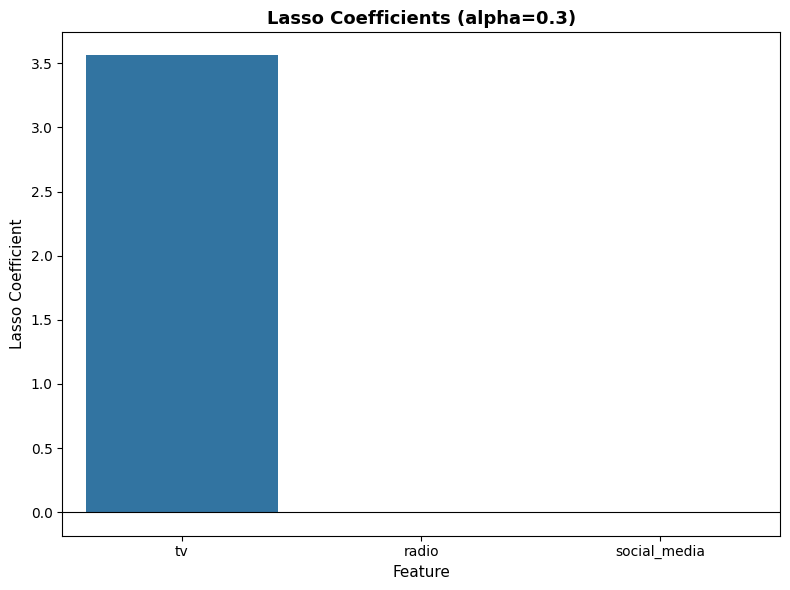

In [31]:
# Select only numeric columns for features (excluding 'sales' which is our target)
numeric_columns = sales_df.select_dtypes(include=[np.number]).columns.tolist()
if "sales" in numeric_columns:
    numeric_columns.remove("sales")

X = sales_df[numeric_columns].values
y = sales_df["sales"].values

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute the coefficients
lasso_coef = lasso.coef_

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x=numeric_columns, y=lasso_coef, ax=ax)
ax.axhline(0, color="black", linewidth=0.8)

ax.set_xlabel("Feature", fontsize=11)
ax.set_ylabel("Lasso Coefficient", fontsize=11)
ax.set_title("Lasso Coefficients (alpha=0.3)", fontsize=13, fontweight="bold")

plt.tight_layout()
plt.show()

## The Problem with Accuracy: Class Imbalance

**Accuracy** measures the fraction of predictions a model gets right. While intuitive, it can be a poor measure of performance when the dataset has a **class imbalance**—a situation where one class is far more frequent than another.

Consider a model for detecting fraudulent bank transactions, where 99% of transactions are legitimate and only 1% are fraudulent. A naive model that simply classifies *every* transaction as "legitimate" would achieve 99% accuracy. However, this model is completely useless because it fails its primary purpose: to detect fraud. This "accuracy paradox" shows why we need more sophisticated metrics.

### A Deeper Look: The Confusion Matrix

The **confusion matrix** is a 2x2 table that provides a complete summary of a binary classifier's performance by cross-tabulating the *actual* labels with the *predicted* labels.


| | **Predicted: Legitimate** | **Predicted: Fraudulent** |
| :--- | :--- | :--- |
| **Actual: Legitimate**| **True Negative (TN)** | **False Positive (FP)** |
| **Actual: Fraudulent**| **False Negative (FN)** | **True Positive (TP)** |


  * **True Positives (TP)**: The model correctly predicted the positive class (e.g., fraudulent transactions correctly identified).
  * **True Negatives (TN)**: The model correctly predicted the negative class (e.g., legitimate transactions correctly identified).
  * **False Positives (FP)**: The model incorrectly predicted the positive class (a "Type I error"). E.g., a legitimate transaction incorrectly flagged as fraudulent.
  * **False Negatives (FN)**: The model incorrectly predicted the negative class (a "Type II error"). E.g., a fraudulent transaction that the model failed to detect.


### Key Metrics Derived from the Confusion Matrix

From these four values, we can calculate more insightful metrics.

#### Precision

**Precision** answers the question: "Of all the positive predictions the model made, how many were actually correct?"

$$\text{Precision} = \frac{TP}{TP + FP}$$

High precision is important when the cost of a **false positive** is high. [cite\_start]For a fraud detection model, high precision means that when the model flags a transaction as fraudulent, it is very likely to be correct, minimizing incorrect alerts to legitimate customers. [cite: 13]

#### Recall (or Sensitivity)

**Recall** answers the question: "Of all the actual positive cases in the data, how many did the model successfully identify?"

$$\text{Recall} = \frac{TP}{TP + FN}$$

High recall is important when the cost of a **false negative** is high. For a fraud detection model, high recall is crucial because you want to catch as many fraudulent transactions as possible, even at the risk of some false alarms.

#### F1-Score

The **F1-score** is the **harmonic mean** of precision and recall. It provides a single, balanced measure of a model's performance, which is especially useful when you need a balance between precision and recall.

$$F_1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

The F1-score favors models that have similar precision and recall values. [cite: 15]


### Implementation in `scikit-learn`

`scikit-learn` provides convenient functions for calculating these metrics.

```python
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 1. Create a generic, reproducible imbalanced dataset
np.random.seed(42)
X = np.random.rand(1000, 5)
# Make class 1 (the positive class) much rarer than class 0
y = np.random.choice([0, 1], 1000, p=[0.9, 0.1])

# 2. Split data and fit a model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 3. Generate the confusion matrix
# The format is [[TN, FP], [FN, TP]]
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# 4. Generate the full classification report
class_report = classification_report(y_test, y_pred)
print(class_report)
```

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = diabetes_df.drop("diabetes", axis=1).values
y = diabetes_df["diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[132  18]
 [ 49  32]]
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       150
           1       0.64      0.40      0.49        81

    accuracy                           0.71       231
   macro avg       0.68      0.64      0.64       231
weighted avg       0.70      0.71      0.69       231



## Logistic Regression: From Probabilities to Predictions

Unlike classifiers that output a direct class label, a logistic regression model's primary output is a **probability**—a value between 0 and 1 representing the model's confidence that an observation belongs to the positive class (class `1`).

To convert this probability into a definitive binary prediction, we use a **probability threshold**. By default, `scikit-learn` uses a threshold of 0.5.

  * If the predicted probability is $\ge 0.5$, the observation is classified as `1`.
  * If the predicted probability is $< 0.5$, the observation is classified as `0`.

In `scikit-learn`, the `.predict()` method applies this 0.5 threshold automatically, while the `.predict_proba()` method allows you to access the raw probabilities for each class.

### The ROC Curve: Visualizing Performance Across All Thresholds

The choice of a 0.5 threshold is often arbitrary. The optimal threshold depends on the specific business problem and the relative costs of false positives versus false negatives. The **Receiver Operating Characteristic (ROC) curve** is a powerful diagnostic tool that visualizes a classifier's performance across *all possible thresholds*.

The ROC curve is a plot of two key metrics:

1.  **True Positive Rate (TPR)** (on the y-axis): Also known as **Recall** or **Sensitivity**, this is the proportion of actual positives that the model correctly identifies.
    $$TPR = \text{Recall} = \frac{TP}{TP + FN}$$
2.  **False Positive Rate (FPR)** (on the x-axis): This is the proportion of actual negatives that the model incorrectly identifies as positive.
    $$FPR = \frac{FP}{FP + TN}$$

#### Interpreting the ROC Curve

  * Each point on the curve represents the TPR and FPR for a specific probability threshold.
  * The **dotted diagonal line** ($y=x$) represents a "chance" model with no predictive skill. Any point on this line means the TPR equals the FPR.
  * The **top-left corner (0, 1)** represents a perfect classifier with a TPR of 1 (it finds all the positives) and an FPR of 0 (it makes no false positive errors).
  * A good model will have a curve that is bowed up towards this top-left corner, indicating that it achieves a high true positive rate while maintaining a low false positive rate.

### Area Under the Curve (AUC)

While the ROC curve is an excellent visualization, we often need a single numerical metric to summarize and compare classifier performance. The **Area Under the ROC Curve (AUC)** provides this.

  * **Interpretation**: The AUC represents the probability that the classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one.
      * **AUC = 1.0**: A perfect classifier.
      * **AUC = 0.5**: A model with no discriminative power, equivalent to random guessing.
      * **AUC \< 0.5**: A model that performs worse than random guessing.


### Implementation in `scikit-learn`

Let's walk through the process of training a model, plotting its ROC curve, and calculating its AUC.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Create a generic, reproducible dataset for binary classification
np.random.seed(42)
X = np.random.rand(500, 5)
# Create a target variable with some relationship to the features
y = (X[:, 0] + X[:, 1]**2 + np.random.normal(0, 0.2, 500)) > 0.8

# 2. Perform train/test split and fit a logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# 3. Get predicted probabilities for the positive class (class 1)
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

# 4. Calculate the ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# 5. Plot the ROC curve using the OOP approach
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(fpr, tpr, label='Logistic Regression')
ax.plot([0, 1], [0, 1], 'k--', label='Chance Model') # Dotted diagonal line
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend()
ax.grid(True, linestyle='--')
plt.show()

# 6. Calculate the Area Under the Curve (AUC)
auc_score = roc_auc_score(y_test, y_pred_probs)
print(f"Area Under the ROC Curve (AUC): {auc_score:.4f}")
```

The plot and the resulting AUC score provide a comprehensive and reliable assessment of the logistic regression model's performance, independent of any single probability threshold.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Instantiate the model
logreg = LogisticRegression(max_iter=1000)

X = diabetes_df.drop("diabetes", axis=1).values
y = diabetes_df["diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit the model
logreg.fit(X_train, y_train)

y_pred_probs = logreg.predict_proba(X_test)[:, 1]

display(y_pred_probs[:10])

array([0.22827276, 0.29826949, 0.72564607, 0.63181403, 0.44266109,
       0.07905003, 0.72624229, 0.12511333, 0.04289497, 0.35173007])

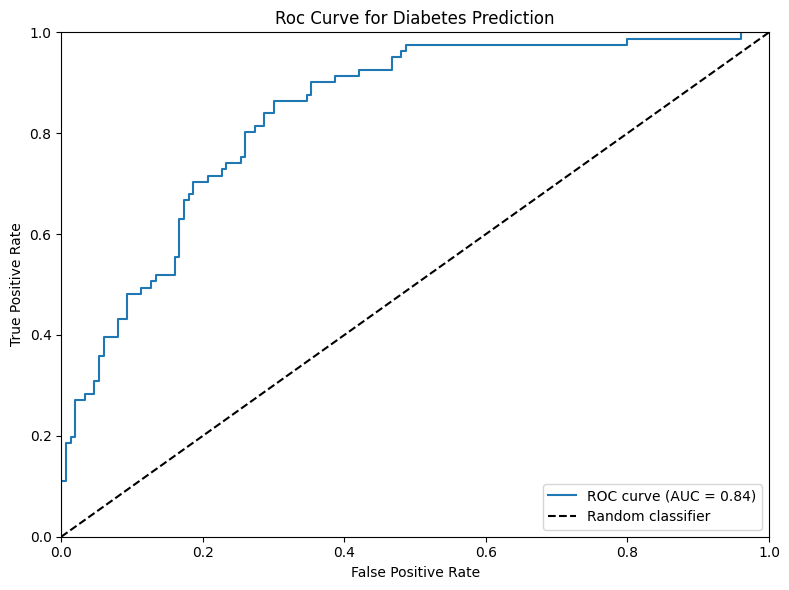

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
auc_score = roc_auc_score(y_test, y_pred_probs)

# Plot tpr against fpr
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
ax.plot([0, 1], [0, 1], 'k--', label='Random classifier')

ax.set(xlabel="False Positive Rate", ylabel="True Positive Rate", title="Roc Curve for Diabetes Prediction")
ax.legend(loc="lower right")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.8375308641975308


In [46]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Convert predicted probabilities to binary predictions using a threshold of 0.5
y_pred = (y_pred_probs >= 0.5).astype(int)

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[129  21]
 [ 39  42]]


In [47]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Convert predicted probabilities to binary predictions using a threshold of 0.5
y_pred = (y_pred_probs >= 0.5).astype(int)

# Calculate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



## Hyperparameters: The Model's Settings

It is crucial to distinguish between a model's *parameters* and its *hyperparameters*.

  * **Parameters**: These are values that the model *learns* from the data during the fitting process. The coefficients in a linear regression are a classic example.
  * **Hyperparameters**: These are the "dials" or settings that we, the data scientists, must configure *before* training the model. They control the model's overall structure and how it learns.

The choice of hyperparameters fundamentally controls the model's complexity and its capacity to learn from the data. A poor choice can easily lead to an underfit or overfit model. The goal of hyperparameter tuning is to find the combination that yields the best performance on unseen data.

### The Hyperparameter Tuning Workflow

The general process for finding the best hyperparameters is:

1.  Define a set of candidate hyperparameter values to test.
2.  For each combination of values, evaluate the model's performance.
3.  Select the combination that yields the best performance.

#### The Crucial Role of Cross-Validation

This evaluation process **must** be done using **cross-validation**. If you tune your hyperparameters by evaluating performance on a single, fixed test set, you will inadvertently "leak" information from the test set into your model selection process. You will end up choosing the hyperparameters that perform best *on that specific test set*, leading to an overly optimistic and unreliable estimate of the model's true ability to generalize.

The correct workflow is:

1.  Split your data once into a **training set** and a **held-out test set**.
2.  Perform the entire hyperparameter tuning process, including its own internal k-fold cross-validation, using **only the training set**.
3.  After the best hyperparameters have been identified, use the **held-out test set** exactly once to get a final, unbiased evaluation of the tuned model's performance.

### Tuning Methods in `scikit-learn`

#### Grid Search (`GridSearchCV`)

Grid search performs an **exhaustive search** over a manually specified "grid" of hyperparameter values. It trains and evaluates a model for every possible combination of the values you provide.

  * **When to Use**: It is effective when the number of hyperparameters and their possible values is relatively small.
  * **The Downside**: It suffers from the "curse of dimensionality." The number of models to train grows exponentially with the number of hyperparameters, making it computationally very expensive for large search spaces.

#### Random Search (`RandomizedSearchCV`)

Instead of trying all possible combinations, random search samples a fixed number of combinations (`n_iter`) from the specified hyperparameter space.

  * **When to Use**: It is a more efficient alternative to grid search, especially when you have many hyperparameters. It can often find a very good combination of hyperparameters much faster than an exhaustive search.


### A Complete Example: Tuning a Ridge Regression Model

Let's walk through the full process of tuning the `alpha` hyperparameter for a `Ridge` regression model.

```python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import Ridge

# 1. Create a generic, reproducible dataset
np.random.seed(42)
X = np.random.rand(200, 10)
y = np.sum(X[:, :5], axis=1) + np.random.normal(0, 0.5, 200) # y depends on first 5 features

# 2. Create the initial train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Set up the hyperparameter tuning components
# Define the parameter grid to search
param_grid = {'alpha': np.logspace(-4, 2, 100)} # A wide range of alpha values

# Instantiate the model
ridge = Ridge()

# Set up the k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Perform the Grid Search on the TRAINING data
# GridSearchCV will use k-fold CV to evaluate each alpha value in the grid.
ridge_cv = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)

# 5. Get the best hyperparameters and their score
print(f"Best Hyperparameters: {ridge_cv.best_params_}")
print(f"Best Cross-Validation Score (R-squared): {ridge_cv.best_score_:.4f}")

# 6. Evaluate the FINAL tuned model on the HELD-OUT test set
# This provides the final, unbiased performance estimate.
final_test_score = ridge_cv.score(X_test, y_test)
print(f"Final Test Set Score: {final_test_score:.4f}")
```

This complete workflow ensures that we find the best hyperparameter settings based on a robust cross-validation procedure on the training data, and then obtain a fair and unbiased assessment of the final model's performance on the completely unseen test data.